In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import files

In [ ]:
forest_data = files.upload()

Saving fire_archive.csv to fire_archive.csv


In [ ]:
forest_data = pd.read_csv('fire_archive.csv')

In [ ]:
forest_data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [ ]:
forest_data.shape

(36011, 15)

In [ ]:
forest_data.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,3.728625e-12,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


In [ ]:
forest_data.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [ ]:
forest_data.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version       float64
bright_t31    float64
frp           float64
daynight       object
type            int64
dtype: object

In [ ]:
forest_data['scan'].value_counts()

1.0    8284
1.1    6000
1.2    3021
1.3    2412
1.4    1848
1.5    1610
1.6    1451
1.7    1281
1.8    1041
1.9     847
2.0     707
2.2     691
2.1     649
2.3     608
2.5     468
2.4     433
2.8     422
3.0     402
2.7     366
2.9     361
2.6     347
3.1     259
3.2     244
3.6     219
3.4     203
3.3     203
3.8     189
3.9     156
4.7     149
4.3     137
3.5     134
3.7     134
4.1     120
4.6     118
4.5     116
4.2     108
4.0     103
4.4     100
4.8      70
Name: scan, dtype: int64

In [ ]:
forest_data['acq_date'].value_counts()

2019-09-10    1317
2019-09-09    1230
2019-09-06    1200
2019-09-08    1200
2019-09-07    1075
              ... 
2019-08-17     300
2019-09-22     294
2019-09-25     293
2019-08-08     291
2019-09-21     241
Name: acq_date, Length: 61, dtype: int64

In [ ]:
forest_data[['satellite']].value_counts()

satellite
Aqua         20541
Terra        15470
dtype: int64

In [ ]:
forest_data['instrument'].value_counts()

MODIS    36011
Name: instrument, dtype: int64

In [ ]:
forest_data['daynight'].value_counts()

D    28203
N     7808
Name: daynight, dtype: int64

In [ ]:
forest_data['version'].value_counts()

6.3    36011
Name: version, dtype: int64

In [ ]:
forest_data1 = forest_data.drop(['version', 'instrument'], axis=1)

In [ ]:
forest_data1.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,48,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,71,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,42,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,33,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,36,298.8,27.6,D,0


In [ ]:
#forest_data1=forest_data1['satellite'].map({"Aqua":0, "Terra":1})

In [ ]:
forest_data2=pd.get_dummies(forest_data1, columns=['daynight', 'satellite'])

In [ ]:
forest_data2.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,type,daynight_D,daynight_N,satellite_Aqua,satellite_Terra
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,48,297.3,6.6,0,1,0,0,1
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,71,297.3,11.3,0,1,0,0,1
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,42,298.7,23.1,0,1,0,0,1
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,33,296.1,6.5,0,1,0,0,1
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,36,298.8,27.6,0,1,0,0,1


In [ ]:
#forest_data3 = pd.concat([forest_data1,forest_data2], axis=1, join='inner')

In [ ]:
#forest_data3.head()

In [ ]:
#Binning 
bins = [0,1,2,3,4,5]
labels = [1,2,3,4,5]
forest_data2['scan_binned']=pd.cut(forest_data2['scan'], bins=bins, labels=labels)

In [ ]:
forest_data2.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,type,daynight_D,daynight_N,satellite_Aqua,satellite_Terra,scan_binned
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,48,297.3,6.6,0,1,0,0,1,1
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,71,297.3,11.3,0,1,0,0,1,1
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,42,298.7,23.1,0,1,0,0,1,4
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,33,296.1,6.5,0,1,0,0,1,2
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,36,298.8,27.6,0,1,0,0,1,4


In [ ]:
#import datetime as dt

In [ ]:
#forest_data2['acq_date'] = pd.to_datetime(forest_data2['acq_date'])

In [ ]:
forest_data2.dtypes

latitude            float64
longitude           float64
brightness          float64
scan                float64
track               float64
acq_date             object
acq_time              int64
confidence            int64
bright_t31          float64
frp                 float64
type                  int64
daynight_D            uint8
daynight_N            uint8
satellite_Aqua        uint8
satellite_Terra       uint8
scan_binned        category
dtype: object

In [ ]:
'''forest_data2['year']=forest_data2['acq_date'].dt.year
forest_data2['month']=forest_data2['acq_date'].dt.month
forest_data2['day']=forest_data2['acq_date'].dt.day'''

"forest_data2['year']=forest_data2['acq_date'].dt.year\nforest_data2['month']=forest_data2['acq_date'].dt.month\nforest_data2['day']=forest_data2['acq_date'].dt.day"

In [ ]:
forest_data2.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,type,daynight_D,daynight_N,satellite_Aqua,satellite_Terra,scan_binned
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,48,297.3,6.6,0,1,0,0,1,1
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,71,297.3,11.3,0,1,0,0,1,1
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,42,298.7,23.1,0,1,0,0,1,4
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,33,296.1,6.5,0,1,0,0,1,2
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,36,298.8,27.6,0,1,0,0,1,4


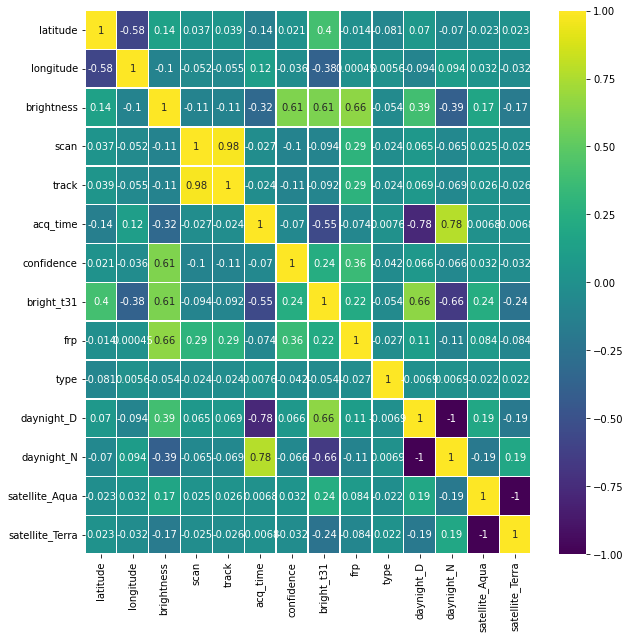

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(forest_data2.corr(),annot=True,linewidths=0.5, cmap='viridis')

In [ ]:
forest_data3=forest_data2.drop(['scan'], axis=1)

In [ ]:
forest_data3.head()

,latitude,longitude,brightness,track,acq_date,acq_time,confidence,bright_t31,frp,type,daynight_D,daynight_N,satellite_Aqua,satellite_Terra,scan_binned
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,48,297.3,6.6,0,1,0,0,1,1
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,71,297.3,11.3,0,1,0,0,1,1
2,-12.8398,132.8744,311.6,1.7,2019-08-01,57,42,298.7,23.1,0,1,0,0,1,4
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,33,296.1,6.5,0,1,0,0,1,2
4,-12.4953,131.4897,310.3,1.9,2019-08-01,57,36,298.8,27.6,0,1,0,0,1,4


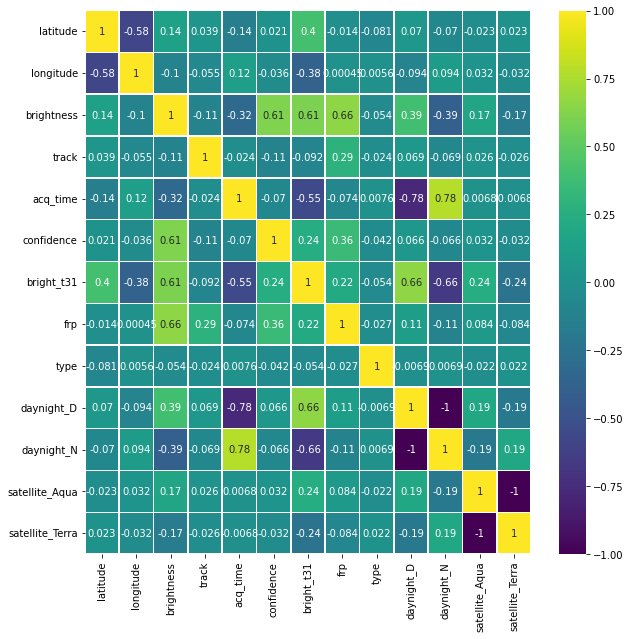

In [ ]:
plt.figure(figsize=(10,10))
cor=forest_data3.corr()
sns.heatmap(cor,annot=True,linewidths=0.5, cmap='viridis')

In [ ]:
#selecting top correlated features with target variable
cor_target = abs(cor['confidence'])

In [ ]:
relevant_features= cor_target[cor_target>0]

In [ ]:
relevant_features

latitude           0.020656
longitude          0.035529
brightness         0.614691
track              0.105949
acq_time           0.070012
confidence         1.000000
bright_t31         0.238506
frp                0.355388
type               0.041632
daynight_D         0.066457
daynight_N         0.066457
satellite_Aqua     0.031723
satellite_Terra    0.031723
Name: confidence, dtype: float64

In [ ]:
forest_data3['type'].value_counts()

0    35666
2      335
3       10
Name: type, dtype: int64

In [ ]:
forest_data4=pd.get_dummies(forest_data3, columns=['type'])

In [ ]:
forest_data4.head()

,latitude,longitude,brightness,track,acq_date,acq_time,confidence,bright_t31,frp,daynight_D,daynight_N,satellite_Aqua,satellite_Terra,scan_binned,type_0,type_2,type_3
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,48,297.3,6.6,1,0,0,1,1,1,0,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,71,297.3,11.3,1,0,0,1,1,1,0,0
2,-12.8398,132.8744,311.6,1.7,2019-08-01,57,42,298.7,23.1,1,0,0,1,4,1,0,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,33,296.1,6.5,1,0,0,1,2,1,0,0
4,-12.4953,131.4897,310.3,1.9,2019-08-01,57,36,298.8,27.6,1,0,0,1,4,1,0,0


In [ ]:
forest_data4['acq_date'] = forest_data4['acq_date'].replace('-', '').astype(int) #replacing the unwanted character in acq_date so that it can be used for further processing

ValueError: ignored

In [ ]:
forest_data4['acq_date'].head()

0    2019-08-01
1    2019-08-01
2    2019-08-01
3    2019-08-01
4    2019-08-01
Name: acq_date, dtype: object

In [ ]:
forest_data4['acq_date'].dtypes

dtype('O')

In [ ]:
forest_data4.describe()

,latitude,longitude,brightness,track,acq_time,confidence,bright_t31,frp,daynight_D,daynight_N,satellite_Aqua,satellite_Terra,type_0,type_2,type_3
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.215281,600.025798,67.551387,301.339138,51.132176,0.783177,0.216823,0.570409,0.429591,0.990420,0.009303,0.000278
std,7.265777,9.261400,18.992808,0.247852,548.369111,23.179946,9.724462,92.280112,0.412087,0.412087,0.495025,0.495025,0.097411,0.096002,0.016662
min,-42.762800,114.104300,300.000000,1.000000,0.000000,0.000000,267.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.000000,205.000000,52.000000,293.600000,13.800000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,-15.706500,136.738500,326.400000,1.100000,424.000000,70.000000,302.400000,25.800000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,-13.343600,147.477500,336.700000,1.300000,600.000000,86.000000,308.600000,52.800000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,-10.072600,153.490400,504.400000,2.000000,2359.000000,100.000000,400.100000,3679.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#forest_data5 = forest_data4['acq_date'].astype(object).astype(int)

In [ ]:
forest_data5 = forest_data4.drop(['acq_date'], axis=1)

In [ ]:
forest_data5.head()

,latitude,longitude,brightness,track,acq_time,confidence,bright_t31,frp,daynight_D,daynight_N,satellite_Aqua,satellite_Terra,scan_binned,type_0,type_2,type_3
0,-11.8070,142.0583,313.0,1.0,56,48,297.3,6.6,1,0,0,1,1,1,0,0
1,-11.7924,142.0850,319.3,1.0,56,71,297.3,11.3,1,0,0,1,1,1,0,0
2,-12.8398,132.8744,311.6,1.7,57,42,298.7,23.1,1,0,0,1,4,1,0,0
3,-14.4306,143.3035,310.1,1.1,57,33,296.1,6.5,1,0,0,1,2,1,0,0
4,-12.4953,131.4897,310.3,1.9,57,36,298.8,27.6,1,0,0,1,4,1,0,0


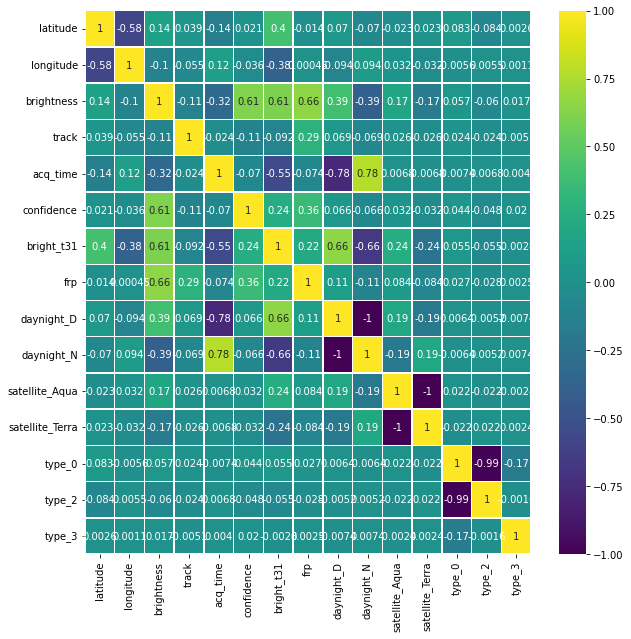

In [ ]:
plt.figure(figsize=(10,10))
cor=forest_data5.corr()
sns.heatmap(cor,annot=True,linewidths=0.5, cmap='viridis')

In [ ]:
cor_target = abs(cor['confidence'])
relevant_features= cor_target[cor_target>0.3]
relevant_features

brightness    0.614691
confidence    1.000000
frp           0.355388
Name: confidence, dtype: float64

In [ ]:
inputs = forest_data5.drop(['confidence'], axis=1)

In [ ]:
targets = forest_data5['confidence']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(inputs, targets, test_size=0.25, random_state=1, shuffle=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #assigning the StandardScaler
scaler.fit(inputs) #fitting the inputs 

StandardScaler()

In [ ]:
inputs_ran = forest_data5.drop(['confidence'], axis=1)

In [ ]:
targets_ran = forest_data5['confidence']

In [ ]:
xtrain_ran,xtest_ran,ytrain_ran,ytest_ran=train_test_split(inputs_ran, targets_ran, test_size=0.25, random_state=1, shuffle=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #assigning the StandardScaler
scaler.fit(inputs_ran) #fitting the inputs 

StandardScaler()

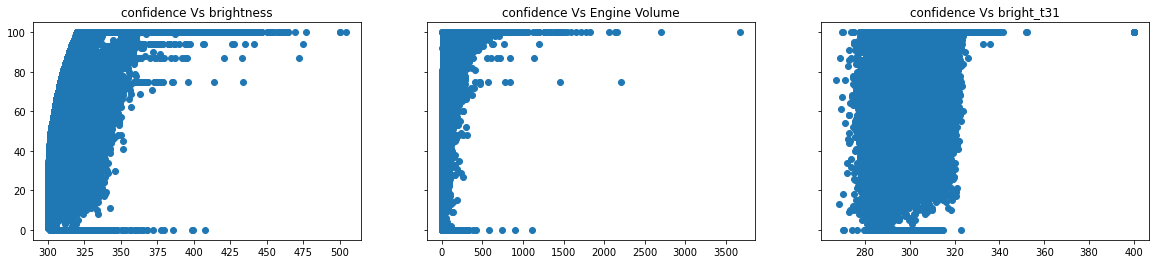

In [ ]:
m, (f1, f2, f3) = plt.subplots(1, 3, sharey=True, figsize = (20,4) ) #ploting price with year, frp, bright_t31
f1.scatter(forest_data4['brightness'], forest_data4['confidence'])
f1.set_title('confidence Vs brightness')
f2.scatter(forest_data4['frp'], forest_data4['confidence'])
f2.set_title('confidence Vs Engine Volume')
f3.scatter(forest_data4['bright_t31'], forest_data4['confidence'])
f3.set_title('confidence Vs bright_t31')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_pred = lin_reg.predict(xtest)

In [ ]:
mean_squared_error(y_pred,ytest)

307.95704117089014

In [ ]:
r2_score(y_pred,ytest)

-0.25677221509974224

In [ ]:
r2_score(xtrain,ytrain)

ValueError: ignored

It is very clear that data is non-linear so linear regression algorithem doesn't work well for this dataset

In [ ]:
ran_for = RandomForestRegressor(n_estimators=700, n_jobs=-1, random_state=1)

In [ ]:
ran_for.fit(xtrain_ran,ytrain_ran)

RandomForestRegressor(n_estimators=700, n_jobs=-1, random_state=1)

In [ ]:
y_pred_ran = ran_for.predict(xtest_ran)

In [ ]:
y_pred_ran

array([76.04285714, 33.79285714, 78.03142857, ..., 76.23428571,
       76.09857143, 99.61285714])

In [ ]:
mean_squared_error(y_pred_ran,ytest_ran)

192.35891896261336

In [ ]:
r2_score(xtrain_ran,ytrain_ran)

ValueError: ignored

In [ ]:
r2_score(y_pred_ran, ytest_ran)

0.4771866151854911

In [ ]:
ytest_ran

709       75
16020     29
9012      74
24006     78
10672     63
        ... 
10234     60
8883      32
20517     60
22521     84
18244    100
Name: confidence, Length: 9003, dtype: int64

In [ ]:
ran_for.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 700,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=300, stop=500, num=20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start=15, stop=35, num=7)]
max_depth.append(None)
min_samples_split = [2, 3, 5,]
min_samples_leaf = [1, 2, 4]
random_grid = {'n_estimators':n_estimators, 'max_features':max_features, 'max_depth':max_depth, 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [300, 310, 321, 331, 342, 352, 363, 373, 384, 394, 405, 415, 426, 436, 447, 457, 468, 478, 489, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 18, 21, 25, 28, 31, 35, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
rf_randoncv = RandomizedSearchCV(estimator=ran_for, param_distributions=random_grid,n_iter=50,cv=3,verbose=2,random_state=42)

In [ ]:
rf_randoncv.fit(xtrain_ran, ytrain_ran)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=  28.9s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=  27.4s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=  27.5s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=  34.7s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=  34.8s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=  36.0s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=478; total time=  11.4s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=47

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=700, n_jobs=-1,
                                                   random_state=1),
                   n_iter=50,
                   param_distributions={'max_depth': [15, 18, 21, 25, 28, 31,
                                                      35, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [300, 310, 321, 331,
                                                         342, 352, 363, 373,
                                                         384, 394, 405, 415,
                                                         426, 436, 447, 457,
                                                         468, 478, 489, 500]},
                   random_state=42, verbose=2)

In [ ]:
ran_for.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
rf_randoncv.best_params_

{'max_depth': 35,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 478}

In [ ]:
ran_for_mod = RandomForestRegressor(n_estimators= 478,max_features= 'sqrt',max_depth= 35,min_samples_leaf= 1,min_samples_split= 3, bootstrap=True)

In [ ]:
ran_for_mod.fit(xtrain_ran,ytrain_ran)

RandomForestRegressor(max_depth=35, max_features='sqrt', min_samples_split=3,
                      n_estimators=478)

In [ ]:
y_pred_ran_mod = ran_for_mod.predict(xtest_ran)

In [ ]:
r2_score(y_pred_ran_mod,ytest_ran)

0.4718796839099806